In [1]:
import pandas as pd

In [2]:
file = pd.read_csv("online_shoppers_intention.csv")

In [3]:
file.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### 變項介紹

   |變項名稱|中文意思|
   |-|-|
   |Administrative|使用者在管理頁面上觀看的頁數|
   |Administrative_Duration|使用者在管理頁面上停留的秒數|
   |Informational|使用者在訊息頁面上觀看的頁數|
   |Informational_Duration|使用者在訊息頁面上停留的秒數|
   |ProductRelated |使用者在商品頁面上觀看的頁數|
   |ProductRelated_Duration|使用者在商品頁面上停留的秒數|
   |BounceRates|點進來後沒幹嘛就離開的比率|
   |ExitRates|最後一個訪問的頁面的比率|
   |PageValues|使用者交易前訪問的頁面的平均價值|
   |SpecialDay|特殊節日|
   |Month|月份|
   |OperatingSystems|操作系統|
   |Browser|瀏覽器|
   |Region|地區|
   |TrafficType|流量類型|
   |VisitorType|訪客類型|
   |Weekend|是否為周末|
   |Revenue|是否有購買行為|

    

### 定義問題

    根據不同變項推測是否有購買行為（分類）

### 觀察資料型態

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### 資料前處理

#### 類別資料編碼
    採用label encoding進行編碼

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
file['Month'] = le.fit_transform(file['Month'])
file['VisitorType'] = le.fit_transform(file['VisitorType'])
file['Weekend'] = le.fit_transform(file['Weekend'])
file['Revenue'] = le.fit_transform(file['Revenue'])

### 切割訓練/測試資料
    
    由於原本的資料中沒有區分訓練及測試資料，因此自行切割訓練及測試資料

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
output_data = file['Revenue']
input_data = file.drop(labels ='Revenue',axis = 1 )

In [18]:
train_x , test_x  , train_y , test_y = train_test_split(input_data,output_data,test_size = 0.3,random_state = 1)

### 模型建構
    
    用決策樹和DNN分別跑跑看結果

In [20]:
from sklearn.tree import DecisionTreeClassifier       
from sklearn.metrics import accuracy_score            

In [21]:
model_dt = DecisionTreeClassifier(
        criterion='gini',                           
        max_depth=2,                                
        max_leaf_nodes=2**4,
        random_state =2020) 
model_dt.fit(train_x,train_y)

pred_train_y = model_dt.predict(train_x)
train_acc = accuracy_score(train_y, pred_train_y)
pred_test_y = model_dt.predict(test_x)
test_acc = accuracy_score(test_y, pred_test_y)

print('train accuracy: {}'.format(train_acc)) 
print('test accuracy: {}'.format(test_acc)) 

train accuracy: 0.8924805932105202
test accuracy: 0.8905109489051095


In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dense, Dropout, Activation

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
model_nn = Sequential()
model_nn.add(Dense(64,input_dim = 17,activation = 'relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(output_dim = 1,activation='sigmoid'))
model_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

train_acc_all_list = model_nn.fit(train_x, train_y,       #輸入 與 輸出
          nb_epoch = 10,          #子代數
          batch_size = 10,        #批量大小 一次參考多少的數據
          verbose = 1 ,           #是否顯示訓練過程
          validation_data=(train_x, train_y)) #拿來預測的資料
    

train_acc = model_nn.evaluate(train_x,train_y)[1]
test_acc = model_nn.evaluate(test_x,test_y)[1]

print('train accuracy: {}'.format(train_acc)) 
print('test accuracy: {}'.format(test_acc)) 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 8631 samples, validate on 8631 samples
Epoch 1/10
8631/8631 [==============================] - 2s 196us/step - loss: 0.1512 - accuracy: 0.8481 - val_loss: 0.1543 - val_accuracy: 0.8457
Epoch 2/10
8631/8631 [==============================] - 1s 159us/step - loss: 0.1735 - accuracy: 0.8260 - val_loss: 0.1554 - val_accuracy: 0.8446
Epoch 3/10
8631/8631 [==============================] - 1s 161us/step - loss: 0.1549 - accuracy: 0.8451 - val_loss: 0.1529 - val_accuracy: 0.8471
Epoch 4/10
8631/8631 [==============================] - 1s 160us/step - loss: 0.1464 - accuracy: 0.8533 - val_loss: 0.1470 - val_accuracy: 0.8530
Epoch 5/10
8631/8631 [==============================] - 1s 164us/step - loss: 0.1403 - accuracy: 0.8596 - val_loss: 0.1461 - val_accuracy: 0.8539
Epoch 6/10
8631/8631 [==============================] - 1s 160us/step - loss: 0.1461 - accuracy: 0.8539 - val_loss: 0.1406 - val_accuracy: 0.8592
Epoch 7/10
8631/8631 [==============================] - 1s 160us/step - loss

### 模型建構_ 小結

    意外的兩個模型幾乎是隨便選用架構就達到了蠻不錯的訓練正確率（皆在.87以上），測試正確率都蠻高，且無overfitting（皆在.88以上），感覺至此模型就已經有不錯的分類能力，以下將會試著挑選幾個變項跑跑看，看看能不能提升正確率

### 資料視覺化

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

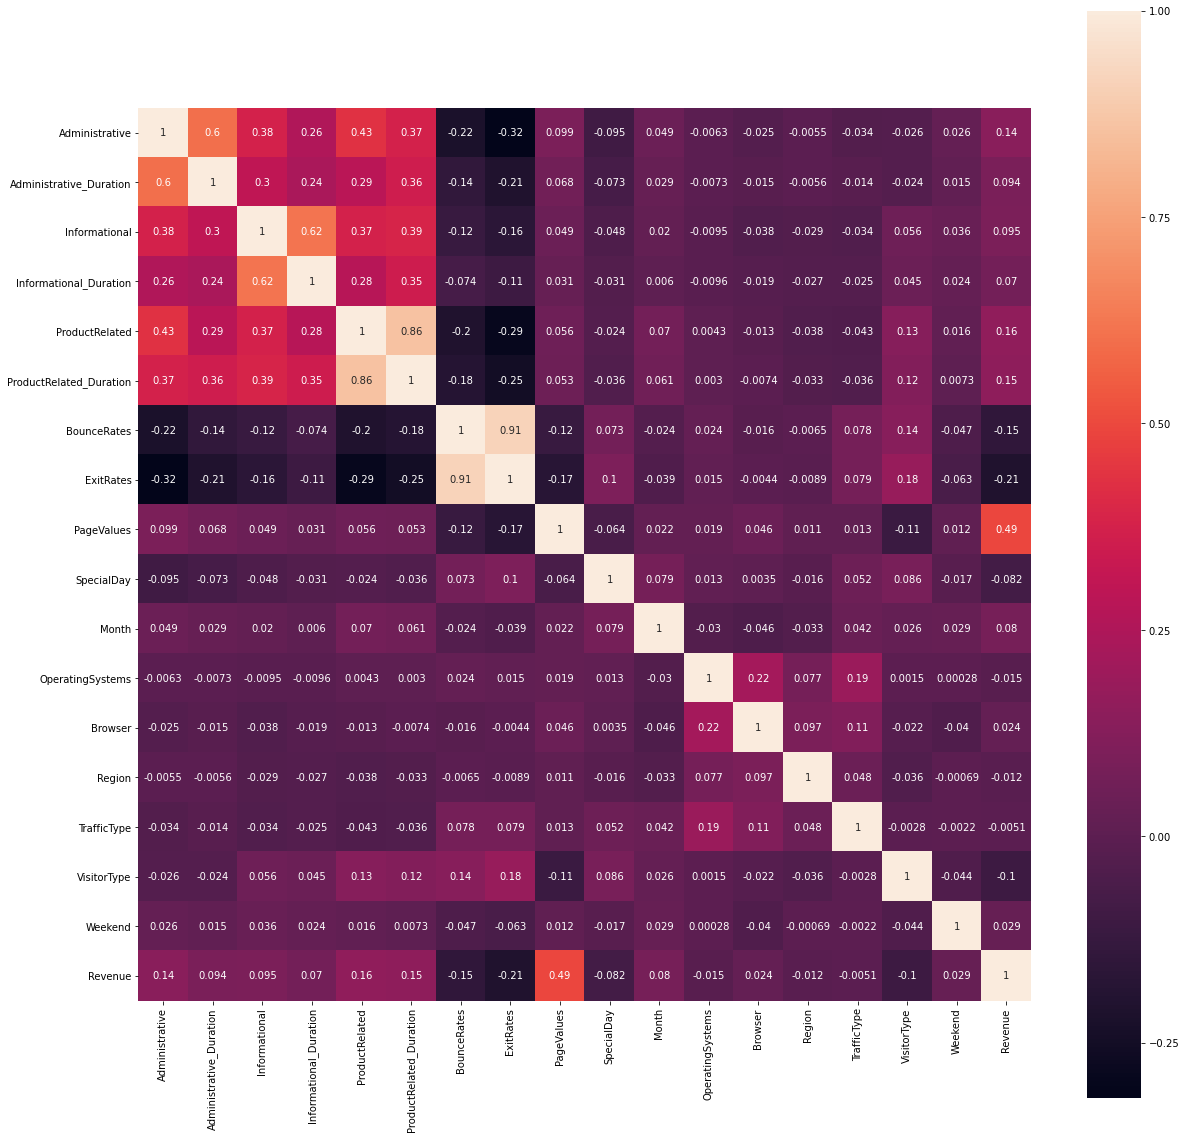

In [26]:
#相關係數熱點圖
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(file.corr(),                    
            annot=True,                
            square=True,               
            xticklabels=True,         
            yticklabels=True,         
            ax=ax)                     

plt.show()          

### 變項選用
    
    根據上表的相關係數矩陣圖可以看見，幾乎所有變項與revenue的相關度都很低，絕大部分皆屬於低相關（僅有與PageValues勉強達到中度相關），嘗試將.1以下的變項移除，再以相同架構的模型跑跑看，希望能提升正確率。此外，ProducRelated和ProducRelated_Duration兩者間的相關係數達.86，為高度相關，因此僅選用其一當作變項
    
    剩下的變項：
    1.Adminidtrative
    2.ProductRelated
    3.PageValues
    4.VisitorType

In [35]:
output_data = file['Revenue']
input_data_selected = pd.DataFrame(
{
    'Administrative':file['Administrative'],
    'ProductRelated':file['ProductRelated'],
    'PageValues':file['PageValues'],
    'VisitorType':file['VisitorType']
})

In [36]:
train_x , test_x  , train_y , test_y = train_test_split(input_data_selected,output_data,test_size = 0.3,random_state = 1)

In [37]:
model_dt = DecisionTreeClassifier(
        criterion='gini',                           
        max_depth=2,                                
        max_leaf_nodes=2**4,
        random_state =2020) 
model_dt.fit(train_x,train_y)

pred_train_y = model_dt.predict(train_x)
train_acc = accuracy_score(train_y, pred_train_y)
pred_test_y = model_dt.predict(test_x)
test_acc = accuracy_score(test_y, pred_test_y)

print('train accuracy: {}'.format(train_acc)) 
print('test accuracy: {}'.format(test_acc)) 

train accuracy: 0.886571660294288
test accuracy: 0.8723979453906461


In [38]:
model_nn = Sequential()
model_nn.add(Dense(64,input_dim = 4,activation = 'relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(output_dim = 1,activation='sigmoid'))
model_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

train_acc_all_list = model_nn.fit(train_x, train_y,       #輸入 與 輸出
          nb_epoch = 10,          #子代數
          batch_size = 10,        #批量大小 一次參考多少的數據
          verbose = 1 ,           #是否顯示訓練過程
          validation_data=(train_x, train_y)) #拿來預測的資料
    

train_acc = model_nn.evaluate(train_x,train_y)[1]
test_acc = model_nn.evaluate(test_x,test_y)[1]

print('train accuracy: {}'.format(train_acc)) 
print('test accuracy: {}'.format(test_acc)) 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 8631 samples, validate on 8631 samples
Epoch 1/10
8631/8631 [==============================] - 2s 176us/step - loss: 0.1080 - accuracy: 0.8826 - val_loss: 0.0961 - val_accuracy: 0.8924
Epoch 2/10
8631/8631 [==============================] - 1s 167us/step - loss: 0.0953 - accuracy: 0.8883 - val_loss: 0.0931 - val_accuracy: 0.8872
Epoch 3/10
8631/8631 [==============================] - 1s 162us/step - loss: 0.0870 - accuracy: 0.8904 - val_loss: 0.0831 - val_accuracy: 0.8932
Epoch 4/10
8631/8631 [==============================] - 1s 170us/step - loss: 0.0829 - accuracy: 0.8921 - val_loss: 0.0804 - val_accuracy: 0.8910
Epoch 5/10
8631/8631 [==============================] - 1s 158us/step - loss: 0.0818 - accuracy: 0.8907 - val_loss: 0.0818 - val_accuracy: 0.8894
Epoch 6/10
8631/8631 [==============================] - 1s 159us/step - loss: 0.0798 - accuracy: 0.8922 - val_loss: 0.0811 - val_accuracy: 0.8855
Epoch 7/10
8631/8631 [==============================] - 2s 198us/step - loss

### 變項選用_小結

    在決策樹模型中準確率些微的下降了，推估是因為變項變少，難以建立較佳的分類規則，而在DNN這邊則因為將較無相關的變項移除後，有了更高的準確率，因此在等等最後一個part中，決策樹將會使用所有的變項，而DNN用挑選過後的變項

### 參數調整
    調整策略：將模型的複雜度提升

In [39]:
train_x , test_x  , train_y , test_y = train_test_split(input_data_selected,output_data,test_size = 0.3,random_state = 1)

In [40]:
model_dt = DecisionTreeClassifier(
        criterion='gini',                           
        max_depth=6,                                
        max_leaf_nodes=2**8,
        random_state =2020) 
model_dt.fit(train_x,train_y)

pred_train_y = model_dt.predict(train_x)
train_acc = accuracy_score(train_y, pred_train_y)
pred_test_y = model_dt.predict(test_x)
test_acc = accuracy_score(test_y, pred_test_y)

print('train accuracy: {}'.format(train_acc)) 
print('test accuracy: {}'.format(test_acc)) 

train accuracy: 0.9048777661916348
test accuracy: 0.881859962151933


In [41]:
train_x , test_x  , train_y , test_y = train_test_split(input_data,output_data,test_size = 0.3,random_state = 1)

In [42]:
model_nn = Sequential()
model_nn.add(Dense(128,input_dim = 4,activation = 'relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(output_dim = 1,activation='sigmoid'))
model_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

train_acc_all_list = model_nn.fit(train_x, train_y,       #輸入 與 輸出
          nb_epoch = 30,          #子代數
          batch_size = 10,        #批量大小 一次參考多少的數據
          verbose = 1 ,           #是否顯示訓練過程
          validation_data=(train_x, train_y)) #拿來預測的資料
    

train_acc = model_nn.evaluate(train_x,train_y)[1]
test_acc = model_nn.evaluate(test_x,test_y)[1]

print('train accuracy: {}'.format(train_acc)) 
print('test accuracy: {}'.format(test_acc)) 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Train on 8631 samples, validate on 8631 samples
Epoch 1/30
8631/8631 [==============================] - 2s 194us/step - loss: 0.1031 - accuracy: 0.8859 - val_loss: 0.0898 - val_accuracy: 0.8928
Epoch 2/30
8631/8631 [==============================] - 2s 179us/step - loss: 0.0856 - accuracy: 0.8894 - val_loss: 0.0779 - val_accuracy: 0.8900
Epoch 3/30
8631/8631 [==============================] - 2s 174us/step - loss: 0.0829 - accuracy: 0.8888 - val_loss: 0.0763 - val_accuracy: 0.8947
Epoch 4/30
8631/8631 [==============================] - 2s 179us/step - loss: 0.0804 - accuracy: 0.8913 - val_loss: 0.0809 - val_accuracy: 0.8942
Epoch 5/30
8631/8631 [==============================] - 2s 183us/step - loss: 0.0795 - accuracy: 0.8927 - val_loss: 0.0783 - val_accuracy: 0.8960
Epoch 6/30
8631/8631 [==============================] - 2s 174us/step - loss: 0.0797 - accuracy: 0.8898 - val_loss: 0.0773 - val_accuracy: 0.8954
Epoch 7/30
8631/8631 [==============================] - 1s 173us/step - loss

### 參數調整_小結
    
    將模型複雜化之後，訓練測試率皆有往上微幅的提升，但是測試準確率卻微幅的下降了，由此推估更為複雜的模型在本命題中並不會有更好的預測效果，且更為複雜的模型會徒增運算空間與時間，因此維持簡單的架構即可。

### 總結
    
    在本命題中由於變項皆為類別變項居多，因此除了DNN外，決策樹也能有不錯的效果而確實最高也有.89的正確率，且不需要很複雜的模型，而DNN則是經過適當的變數篩選後，同樣不需要很複雜的模型也能達到不錯的正確率（.89）。